In [1]:
directory = '../../output.demo'
render='svg'

In [2]:
from charcoal.utils import CSV_DictHelper
from IPython.display import display, Markdown

summary = CSV_DictHelper(f'{directory}/genome_summary.csv', 'genome')
display(Markdown(f"# charcoal summary report for `{directory}`"))


# charcoal summary report for `../../output.demo`

In [3]:
import plotly.graph_objects as go
from charcoal import utils
import collections
import os

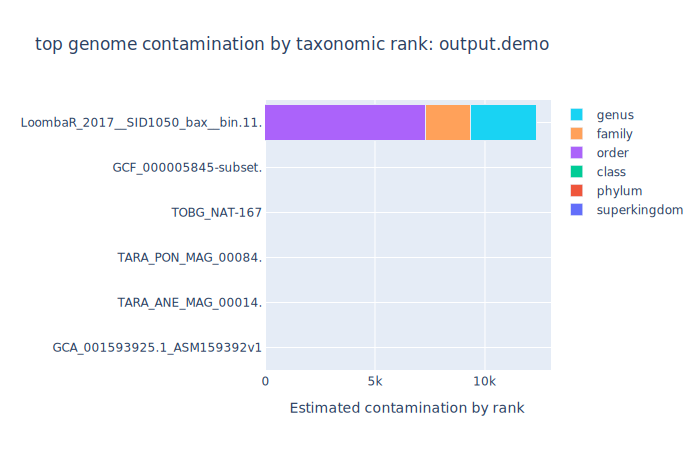

In [4]:
def make_hitlist_data(hit_list_filename, omit_genus=True, num=10):
    hits = utils.CSV_DictHelper(hit_list_filename, 'genome')
    
    endings = '.fna.gz', 'fa.gz', '.fa', '_genomic'
    
    # sort by sum of bad bp at specific rank
    if omit_genus:
        sort_by = 'family_bad_bp'
    else:
        sort_by = 'genus_bad_bp'
    
    # pick off the top num items, sorted by given sort_by
    items = list(hits.rows.items())
    items.sort(key=lambda item: -int(item[1][sort_by]))
    items = items[:num]
    items.reverse()
    
    hitlist_data = collections.defaultdict(list)
    names = hitlist_data['names']
    
    # for each item, retrieve all tax rank bp values
    for name, row in items:
        # clean up names:
        for end in endings:
            if name.endswith(end): name = name[:-len(end)]
        names.append(name)

        last_bp = 0
        for key in 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus':
            bp = row[f'{key}_bad_bp']
            bp = int(bp)
            values = hitlist_data[key]
            values.append(bp - last_bp)
            last_bp = bp
            
    return hitlist_data

def plot_hitlist(hit_list_filename, omit_genus=True, num=10):
    hitlist_data = make_hitlist_data(hit_list_filename, omit_genus, num)
    
    names = hitlist_data['names']

    barchart_objs = []
    for key in 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus':
        values = hitlist_data[key]
        if omit_genus and key == 'genus': break
            
        bc_obj = go.Bar(name=key, y=names, x=values, orientation='h')
        barchart_objs.append(bc_obj)
        
    fig = go.Figure(data=barchart_objs)
    title = f'top genome contamination by taxonomic rank: {os.path.dirname(hit_list_filename)[6:]}'
    fig.update_layout(barmode='stack', template='plotly',
                      xaxis_title='Estimated contamination by rank',
                      title=title)

    return fig

fig = plot_hitlist(f'{directory}/hit_list_for_filtering.csv', omit_genus=False)
if not render: render_name = None
else: render_name = render
fig.show(render_name)

In [5]:
output = []
output.append('## Individual genome reports:')
for genome in summary.rows:
    output.append(f"* [`{genome}`]({genome}.fig.html)")
    
display(Markdown("\n".join(output)))


## Individual genome reports:
* [`LoombaR_2017__SID1050_bax__bin.11.fa.gz`](LoombaR_2017__SID1050_bax__bin.11.fa.gz.fig.html)
* [`GCF_000005845-subset.fa.gz`](GCF_000005845-subset.fa.gz.fig.html)
* [`TOBG_NAT-167.fna.gz`](TOBG_NAT-167.fna.gz.fig.html)
* [`TARA_PON_MAG_00084.fa.gz`](TARA_PON_MAG_00084.fa.gz.fig.html)
* [`TARA_ANE_MAG_00014.fa.gz`](TARA_ANE_MAG_00014.fa.gz.fig.html)
* [`GCA_001593925.1_ASM159392v1_genomic.fna.gz`](GCA_001593925.1_ASM159392v1_genomic.fna.gz.fig.html)